In [1]:
import sys
import numpy
import pandas
import sklearn
import scipy
import matplotlib
print('Python: {}'.format(sys.version))
print('numpy: {}'.format(numpy.__version__))
print('scipy: {}'.format(scipy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
numpy: 1.16.2
scipy: 1.2.1
pandas: 0.24.2
matplotlib: 3.0.3
sklearn: 0.20.3


In [2]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [3]:
#uploading dataset
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names= ['sepal-l','sepal-w','petal-l','petal-w','class']
dataset= read_csv(url,names=names)


In [4]:
#dimensions of the data set
print(dataset.shape)

(150, 5)


In [5]:
#take a peek at the data
print(dataset.head(20))

    sepal-l  sepal-w  petal-l  petal-w        class
0       5.1      3.5      1.4      0.2  Iris-setosa
1       4.9      3.0      1.4      0.2  Iris-setosa
2       4.7      3.2      1.3      0.2  Iris-setosa
3       4.6      3.1      1.5      0.2  Iris-setosa
4       5.0      3.6      1.4      0.2  Iris-setosa
5       5.4      3.9      1.7      0.4  Iris-setosa
6       4.6      3.4      1.4      0.3  Iris-setosa
7       5.0      3.4      1.5      0.2  Iris-setosa
8       4.4      2.9      1.4      0.2  Iris-setosa
9       4.9      3.1      1.5      0.1  Iris-setosa
10      5.4      3.7      1.5      0.2  Iris-setosa
11      4.8      3.4      1.6      0.2  Iris-setosa
12      4.8      3.0      1.4      0.1  Iris-setosa
13      4.3      3.0      1.1      0.1  Iris-setosa
14      5.8      4.0      1.2      0.2  Iris-setosa
15      5.7      4.4      1.5      0.4  Iris-setosa
16      5.4      3.9      1.3      0.4  Iris-setosa
17      5.1      3.5      1.4      0.3  Iris-setosa
18      5.7 

In [6]:
#statistical summary
print(dataset.describe())

          sepal-l     sepal-w     petal-l     petal-w
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [7]:
#class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


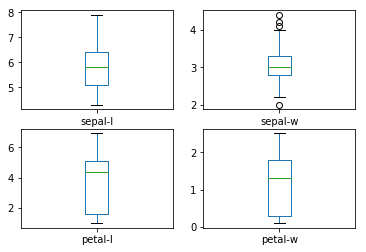

In [8]:
#box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

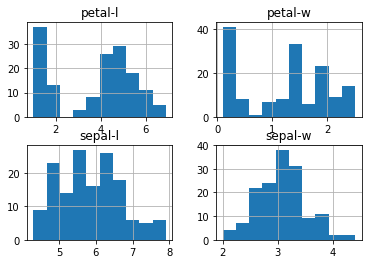

In [9]:
#histgram of plots
dataset.hist()
pyplot.show()

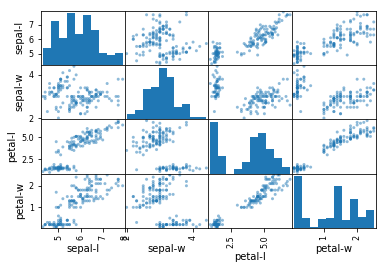

In [10]:
#multivariateplots
scatter_matrix(dataset)
pyplot.show()

In [11]:
#creating a validation dataset
#splitting dataset
array= dataset.values
X= array[:, 0:4]
y= array[:, 4]
x_t, x_v, Y_t, Y_v= train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
#logistic regression
#lineardiscriminantanalysys
#knearestneighbors
#classification and regression trees
# gausian NB
#support vector machines



pass

In [13]:
#bilding models

models= []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [14]:
#created models evaluation
results =[]
names= []
for name, model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1)
    cv_results= cross_val_score(model,x_t,Y_t,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s %f (%f)'% (name,cv_results.mean(), cv_results.std()) )

LR 0.960897 (0.052113)
LDA 0.973974 (0.040110)
KNN 0.957191 (0.043263)
NB 0.948858 (0.056322)
SVM 0.983974 (0.032083)


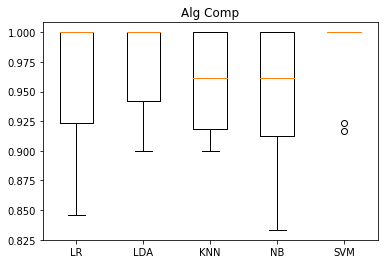

In [15]:
#model comaprison
pyplot.boxplot(results, labels=names)
pyplot.title('Alg Comp')
pyplot.show()

In [16]:
#make a prediciton on svm

model =SVC(gamma='auto')
model.fit(x_t,Y_t)
predictions = model.predict(x_v)

In [17]:
#evaluate predicitons
print(accuracy_score(Y_v, predictions))
print(confusion_matrix(Y_v, predictions))
print(classification_report(Y_v,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

